<a href="https://colab.research.google.com/github/William-Muko/Twitter-Sentiment-analysis/blob/main/Ukraine_vs_Russia_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

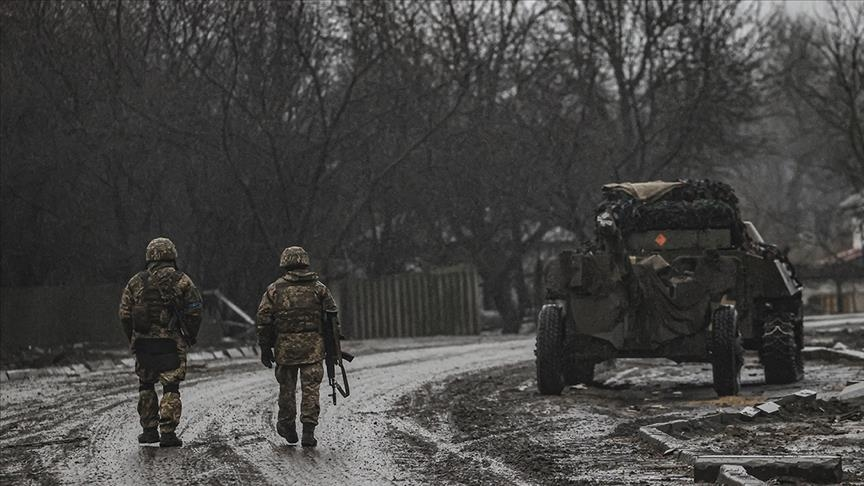

It 5 months since the war between Russia and Ukraine started. Many Countries have supported Ukraine by introducing economic sanctions on Russia.There a lot of tweets about the Ukraine and Russia war based on whats happening on the ground, what people feel about it, and who they're supporting. Credits to Aman Kharwal for the inspiration to carry out this analysis and interest to analyse peoples sentiments on the war. The dataset for this Twitter sentiment analysis is from Kaggle: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("filename.csv")

In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1556448689886994434,1556448689886994434,2022-08-08 01:14:19 UTC,2022-08-08,01:14:19,0,1516504540048240650,appleleadership,Tyler Beasley,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1556448678461726722,1556448678461726722,2022-08-08 01:14:17 UTC,2022-08-08,01:14:17,0,1446189662251409416,mrfickle87,MrFickle87,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1556448678017220608,1556447962569515010,2022-08-08 01:14:16 UTC,2022-08-08,01:14:16,0,1552432364697034753,conserned10,Conserned Citizen,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'fatts314', 'name': 'im wat u...",NaN,NaN,NaN,NaN
3,1556448670274314240,1556446745424453632,2022-08-08 01:14:15 UTC,2022-08-08,01:14:15,0,298611233,sabonishook,Z (not the Russia Z fuck Putin),NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'J_Meeks7', 'name': 'Josh Mee...",NaN,NaN,NaN,NaN
4,1556448669720780802,1556035026323750913,2022-08-08 01:14:14 UTC,2022-08-08,01:14:14,0,282180759,z500_tj,z500_tj,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'poorpeeps', 'name': '🇺🇸 The ...",NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

For this analysis, we only need three columns (username, tweet and language). I'm only going to select these columns and move on:

In [5]:
data1 = data[["username", "tweet", "language"]]

Let's see whether any of these columns have any null values in them:

In [6]:
data1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let's have a quick look at how many tweets are posted in which language:

In [7]:
data1["language"].value_counts()

en     8631
pt      400
qme     214
it      154
und     106
ru       91
ja       75
in       63
es       28
ar       27
ca       26
de       26
th       20
qht      16
uk       15
pl       10
fi       10
tl       10
fr        9
vi        8
zxx       7
sr        7
ro        6
nl        6
ur        5
bg        4
et        4
da        3
qam       3
cs        3
cy        3
bn        3
hi        2
art       2
no        2
lv        2
el        2
ht        1
zh        1
sl        1
tr        1
Name: language, dtype: int64

Most of the tweets are in English.

In [12]:
# Data cleaning for sentiment analysis
import io
from nltk.corpus import stopwords 
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
  

data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


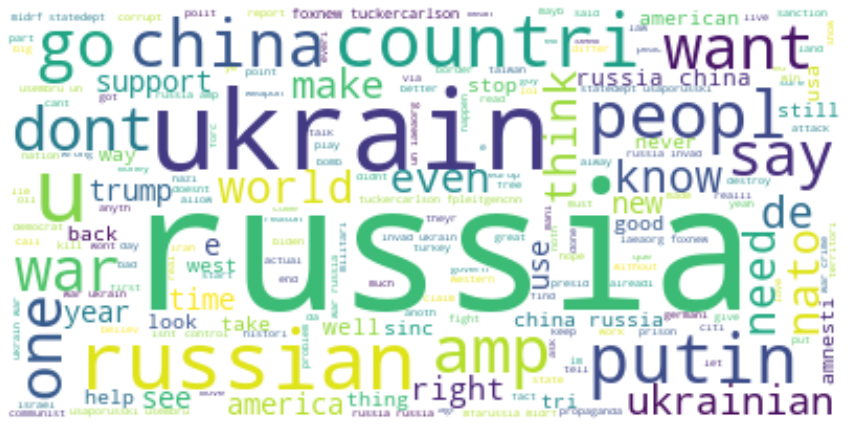

In [13]:
#Wordcloud of tweets
text = "".join(i for i in data1.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This shows the most frequently used words in the tweets by people showing their feelings and updates about the Ukraine and Russia war.

In [16]:
# Calculating the sentiment scores of the tweets
#Adding three more columns to the dataset: Positive, Negative, and Neutral.

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]

data.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,ms halo awar ukrain investig hunter biden us t...,0.000,0.084,0.916
1,russia ukrain arent much wait usa keep give we...,0.000,0.371,0.629
2,youtub brittney griner news media pick fact ...,0.113,0.113,0.775
3,barstoolbigcat bssportsbook stoolpresid right...,0.000,0.314,0.686
4,poorpeep well strike bargain order protect us ...,0.295,0.239,0.466


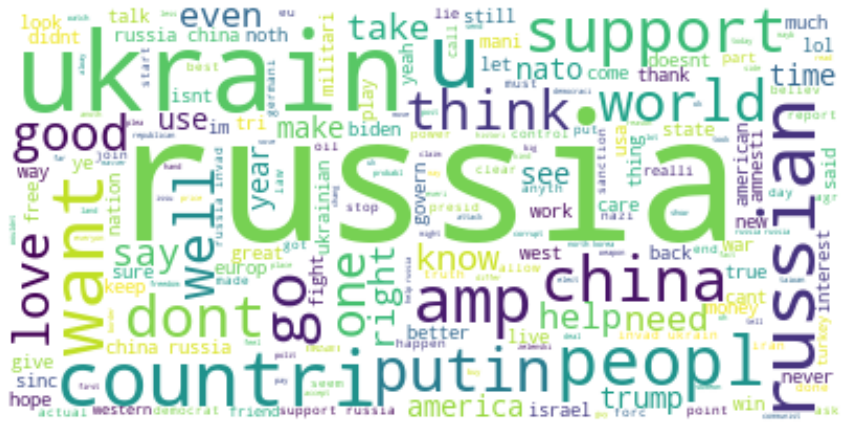

In [17]:
# Most frequently used words with positive sentiments
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

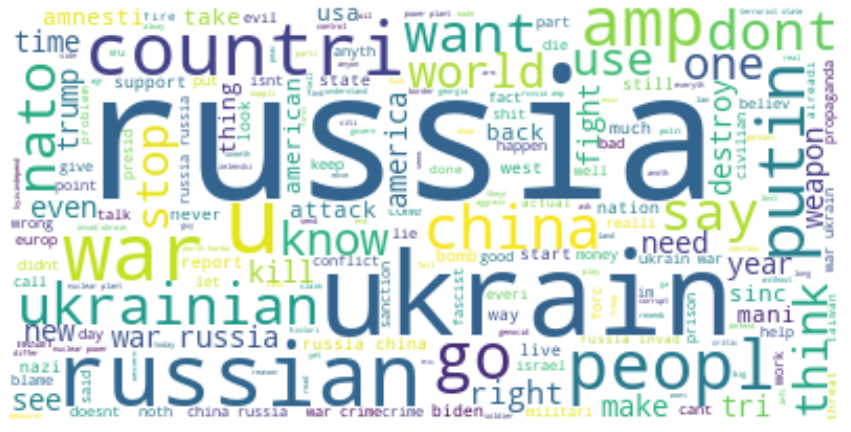

In [18]:
# Most frequently used words with negative sentiments
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Russia is the world’s 3rd oil producer, the 2nd natural gas producer and among the top 5 producers of steel, nickel and aluminum. It is also the largest wheat exporter in the world (almost 20% of global trade). On its side, Ukraine is a key producer of corn (6th largest), wheat (7th), sunflowers (1st), and is amongst the top ten producers for sugar beet, barley, soya and rapeseed.On the day the invasion began, financial markets around the world fell sharply, and the prices of oil, natural gas, metals and food commodities surged.

I hope this war ends soon and things get back to normal.